In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras import datasets,layers,models

In [3]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

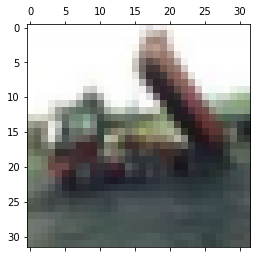

In [5]:
plt.matshow(X_train[2])

In [6]:
y_train[2]

array([9], dtype=uint8)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
classes[y_train[2][0]]

'truck'

In [9]:
X_train_scaled = (X_train)/255
X_test_scaled = (X_test)/255

In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='ADAM',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 40s 25ms/step - loss: 2.4979 - accuracy: 0.1574
Epoch 2/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.8360 - accuracy: 0.2741
Epoch 3/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.6628 - accuracy: 0.3406
Epoch 4/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.5170 - accuracy: 0.4289
Epoch 5/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.3267 - accuracy: 0.5140
Epoch 6/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.1833 - accuracy: 0.5670
Epoch 7/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.1132 - accuracy: 0.5943
Epoch 8/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0671 - accuracy: 0.6124
Epoch 9/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.0258 - accuracy: 0.6302
Epoch 10/10
1563/1563 [==============================] - 40s 26m

In [19]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.1950 - accuracy: 0.5881


[1.195037841796875, 0.588100016117096]

In [20]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 3s 6ms/step


In [25]:
classes[np.argmax(y_pred[:1])]

'ship'

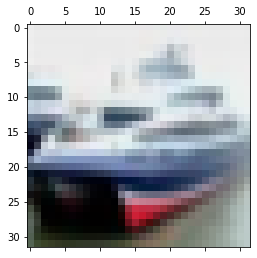

In [26]:
plt.matshow(X_test[1])